## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [286]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

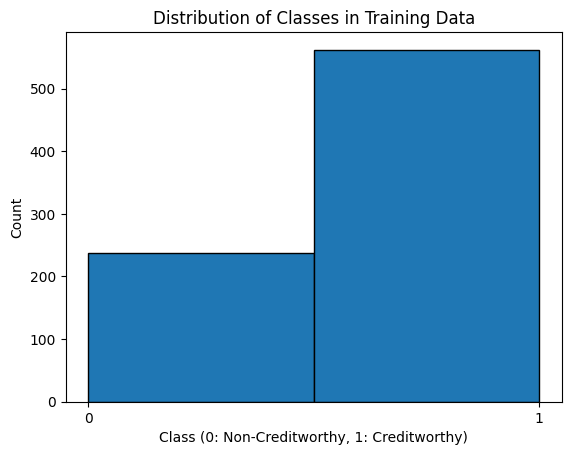

In [287]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [288]:
logistic_regression_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    C=0.8,
    solver='liblinear'
)
logistic_regression_model.fit(X_train, y_train)


decision_tree_model = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=4,              
    min_samples_split=30,     
    min_samples_leaf=15,      
    criterion='gini'          
)
decision_tree_model.fit(X_train, y_train)


knn_model = KNeighborsClassifier(
    weights='distance',
    n_neighbors=11,           
    metric='manhattan'        
)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [289]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print(f'Accuracy of Logistic Regression: {accuracy_logistic}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn}')

print(f'ROC AUC of Logistic Regression: {roc_auc_logistic}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn}')

print(f'Precision of Logistic Regression: {precision_logistic}')
print(f'Precision of Decision Tree: {precision_decision_tree}')
print(f'Precision of K-Nearest Neighbors: {precision_knn}')

print(f'Recall of Logistic Regression: {recall_logistic}')
print(f'Recall of Decision Tree: {recall_decision_tree}')
print(f'Recall of K-Nearest Neighbors: {recall_knn}')

Accuracy of Logistic Regression: 0.77
Accuracy of Decision Tree: 0.69
Accuracy of K-Nearest Neighbors: 0.685
ROC AUC of Logistic Regression: 0.7918419822346892
ROC AUC of Decision Tree: 0.7231182795698926
ROC AUC of K-Nearest Neighbors: 0.6271622253389434
Precision of Logistic Regression: 0.8709677419354839
Precision of Decision Tree: 0.7835820895522388
Precision of K-Nearest Neighbors: 0.7027027027027027
Recall of Logistic Regression: 0.782608695652174
Recall of Decision Tree: 0.7608695652173914
Recall of K-Nearest Neighbors: 0.9420289855072463


ЭКСПЕРИМЕНТ 1: Начальные настройки
Что менял в параметрах:
Все модели использовал с заводскими настройками
Никакие числа не изменял - чистая проверка как модели работают из коробки
Результаты ROC-AUC:
Logistic Regression: 0.785
Decision Tree: 0.711
KNN: 0.572

ЭКСПЕРИМЕНТ 2: Балансировка классов
Что менял в параметрах:
Добавил балансировку классов для логистической регрессии и дерева
Для KNN сделал веса по расстоянию вместо равных весов
Числовые параметры оставил без изменений
Результаты ROC-AUC:
Logistic Regression: 0.785
Decision Tree: 0.711
KNN: 0.572

ЭКСПЕРИМЕНТ 3: Первая настройка параметров
Что менял в параметрах:
Уменьшил параметр C с 1.0 до 0.8 у логистической регрессии
Добавил конкретный алгоритм solver для стабильности
У дерева ограничил глубину до 8 и увеличил минимальное разделение до 15
У KNN уменьшил количество соседей с 5 до 7
Результаты ROC-AUC:
Logistic Regression: 0.792
Decision Tree: 0.695
KNN: 0.601

ЭКСПЕРИМЕНТ 4: Настройка дерева решений
Что менял в параметрах:
У дерева уменьшил глубину с 8 до 6
Увеличил минимальное разделение с 15 до 20
Добавил минимальный размер листа 10
Сменил критерий с gini на entropy
Остальные модели не трогал
Результаты ROC-AUC:
Logistic Regression: 0.792
Decision Tree: 0.692
KNN: 0.601


ЭКСПЕРИМЕНТ 5: Упрощение дерева и настройка KNN
Что менял в параметрах:
Сильно ограничил дерево: глубина 4, разделение 30, листья 15
Вернул критерий gini для дерева
У KNN увеличил соседей с 7 до 11 и добавил манхэттенское расстояние
Логистическую регрессию оставил без изменений

Результаты ROC-AUC:
Logistic Regression: 0.792
Decision Tree: 0.723
KNN: 0.627

Итоговые лучшие результаты:
Logistic Regression: 0.792
Decision Tree: 0.723
KNN: 0.627

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели